# Fourier Lens

This notebook contains the problems which are solved with the Diffraction Tool

## Import all the things

Import regular packages

In [1]:
%matplotlib inline

import cv2
import numpy as np
from cmath import pi
import matplotlib.pyplot as plt


Add relative path

In [2]:
import sys
import os
sys.path.append("../scripts")

Import Diffraction Tool

In [3]:
from DiffractionTool import RaySomSolver
from DiffractionTool import PhaseModulator 
from DiffractionTool import HelperFunctions as hp

## Problems

By using Angle spectrum method or RS diffraction integral, numerically simulate the image of the object under different magnification, $ M=1,M=2,M=6 $, by means of layer by layer propagation of the light field. For detailed imaging results, please refer to the picture below.

<img src="https://github.com/yesunhuang/Optics_Toolbox_In_Python/blob/d03ce783648cac68aa20def4973a9ee44055fc0f/notebooks/imgs/Prob3.png" width="50%">

<img src="imgs/Prob3.png" width="50%">

#### Paramters

In [4]:
N_size=2001
#μm plane [400,400]μm 
interval=0.2
waveLambda=0.633
k=2.0*pi/waveLambda
actualSize=N_size*interval
xyInterval=[interval]*2

#### Original Image

In [5]:
currentPath=os.getcwd()
dataPath=os.path.join(currentPath,"data")
filename='Prob3Data.png'

In [6]:
grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
imgActualSize=40
imgNSize=grayImg.shape[0]
grayImg=np.where(grayImg>100,grayImg,0)

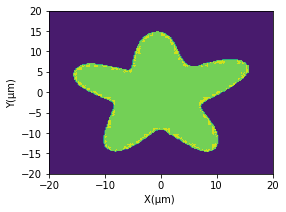

In [7]:
labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(grayImg,labels,range)

#### Pre-Modified Image

(4242, 4242)


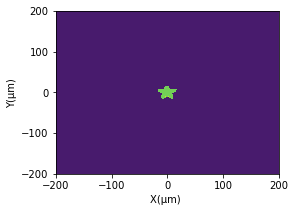

In [8]:
padSize=int((actualSize/(imgActualSize)*imgNSize-imgNSize)/2)
preImg=cv2.copyMakeBorder(grayImg,padSize,padSize,padSize,padSize,cv2.BORDER_CONSTANT,value=0)
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(preImg,labels,range)
print(preImg.shape)

(2001, 2001)


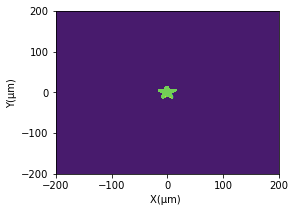

In [9]:
preImg=cv2.resize(preImg,(N_size,N_size))
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(preImg,labels,range)
print(preImg.shape)

#### Propagator of wavefront via Rayleigh-Sommerfeld method

In [10]:
propagator=RaySomSolver(N_size,xyInterval,k)

#### M=1

$z_1=z_2=2f=200\mu m$

In [11]:
z1=z2=200
f=100
r=210

U1

In [12]:
U0=np.sqrt(preImg)
U1=propagator.cal_wavefront(U0,z1)

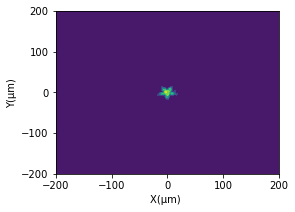

In [13]:
hp.displace_2d(hp.intensity(U1),labels,range)

U1'

In [14]:
lens=PhaseModulator()
lens.get_normal_lens_modulator(k,f,r)
U1_af=lens.apply_modulator(U1,N_size,xyInterval)

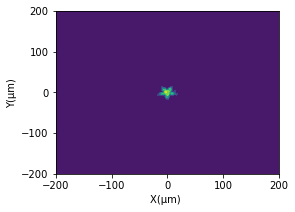

In [15]:
hp.displace_2d(hp.intensity(U1_af),labels,range)

Ui

In [16]:
Ui=propagator.cal_wavefront(U1_af,z2)

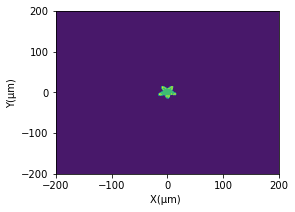

In [17]:
hp.displace_2d(hp.intensity(Ui),labels,range)

#### M=2

$$z_1=\frac{3}{2}f=150\mu m$$
$$z_2=2z_1=300\mu m$$

In [18]:
z1=150
z2=300
f=100
r=210

U1

In [19]:
U0=np.sqrt(preImg)
U1=propagator.cal_wavefront(U0,z1)

U1'

In [20]:
lens=PhaseModulator()
lens.get_normal_lens_modulator(k,f,r)
#U1_af=lens.apply_modulator(U1,N_size,xyInterval)
U1_af=(lens.get_modulator_matrix(N_size,xyInterval))*U1

Ui

In [21]:
Ui=propagator.cal_wavefront(U1_af,z2)

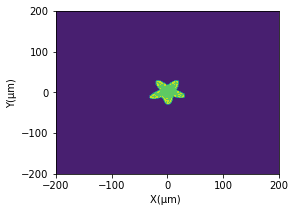

In [22]:
hp.displace_2d(hp.intensity(Ui),labels,range)

M=6

$$z_1=\frac{7}{6}f=233.33\mu m$$
$$z_2=2z_1=1400\mu m$$

In [23]:
f=100
r=210
z1=7.0*f/6.0
z2=6*z1

U1

In [24]:
U0=np.sqrt(preImg)
U1=propagator.cal_wavefront(U0,z1)

U1'

In [25]:
lens=PhaseModulator()
lens.get_normal_lens_modulator(k,f,r)
U1_af=lens.apply_modulator(U1,N_size,xyInterval)

Ui

In [26]:
Ui=propagator.cal_wavefront(U1_af,z2)

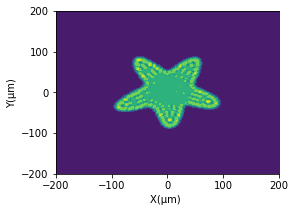

In [27]:
hp.displace_2d(hp.intensity(Ui),labels,range)